In [17]:
import keras
from keras.models import Sequential
from keras.preprocessing import image
from keras.layers import Activation,Dense,Dropout,Conv2D,Flatten,MaxPooling2D,BatchNormalization
from keras.datasets import cifar10
from keras import optimizers
from matplotlib import pyplot as plt

In [18]:
# generate cifar10 data
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [20]:
# config parameters
num_classes = 10
input_shape = x_train.shape[1:4]
optimizer = optimizers.Adam(lr=0.0003)

In [21]:
# convert label to one-hot
one_hot_y_train = keras.utils.to_categorical(y_train,num_classes=num_classes)
one_hot_y_test = keras.utils.to_categorical(y_test,num_classes=num_classes)

(32, 32, 3)


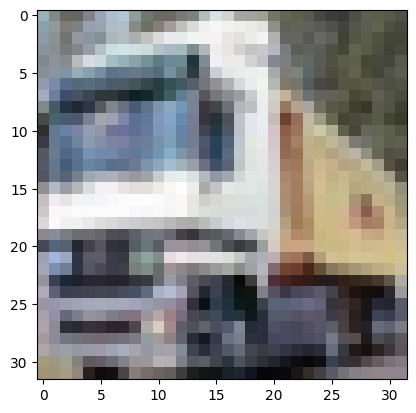

In [22]:
# check data
plt.imshow(x_train[1])
print(x_train[1].shape)

In [23]:
# build model(similar to VGG16, only change the input and output shape)
model = Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=input_shape,padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dense(4096,activation='relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [24]:
# config optimizer,loss,metrics
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
# check model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                 

In [27]:
# train
history=model.fit(x=x_train,y=one_hot_y_train,batch_size=128,epochs=10,validation_split=0.1)

Epoch 1/10
352/352 [==============================] - 25s 70ms/step - loss: 2.3027 - accuracy: 0.0997 - val_loss: 2.3027 - val_accuracy: 0.0950
Epoch 2/10
352/352 [==============================] - 22s 61ms/step - loss: 2.3027 - accuracy: 0.0993 - val_loss: 2.3027 - val_accuracy: 0.0986
Epoch 3/10
352/352 [==============================] - 21s 61ms/step - loss: 2.3027 - accuracy: 0.0998 - val_loss: 2.3028 - val_accuracy: 0.0950
Epoch 4/10
352/352 [==============================] - 22s 62ms/step - loss: 2.3027 - accuracy: 0.0993 - val_loss: 2.3029 - val_accuracy: 0.0950
Epoch 5/10
352/352 [==============================] - 22s 63ms/step - loss: 2.3027 - accuracy: 0.0965 - val_loss: 2.3029 - val_accuracy: 0.0958
Epoch 6/10
352/352 [==============================] - 22s 62ms/step - loss: 2.3027 - accuracy: 0.0955 - val_loss: 2.3028 - val_accuracy: 0.0976
Epoch 7/10
352/352 [==============================] - 22s 61ms/step - loss: 2.3027 - accuracy: 0.0990 - val_loss: 2.3029 - val_accuracy:

In [28]:
# evaluate
print(model.metrics_names)
model.evaluate(x=x_test,y=one_hot_y_test,batch_size=512)

['loss', 'accuracy']
20/20 [==============================] - 1s 53ms/step - loss: 2.3026 - accuracy: 0.1000


[2.302597999572754, 0.10000000149011612]

1/1 [==============================] - 0s 143ms/step
predict class: 6
expected class: 5


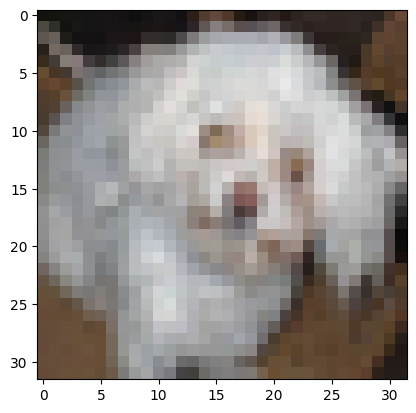

In [29]:
# predict
plt.imshow(x_test[1000])

result = model.predict(x_test[1000:1001]).tolist()
predict = 0
expect = y_test[1000][0]
for i,_ in enumerate(result[0]):
    if result[0][i] > result[0][predict]:
        predict = i
print("predict class:",predict)
print("expected class:",expect)

In [30]:
# save model
model.save("keras-VGG16-cifar10.h5")

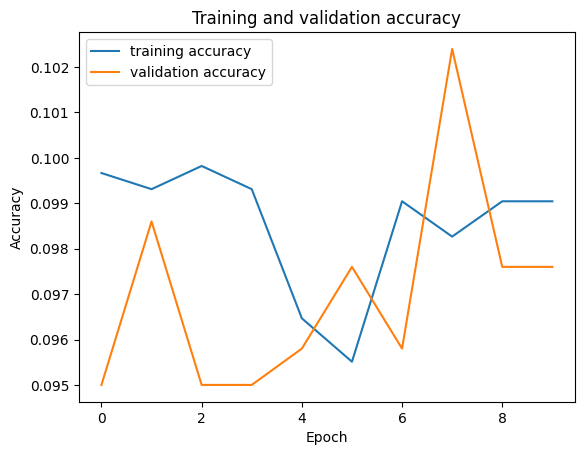

In [31]:
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

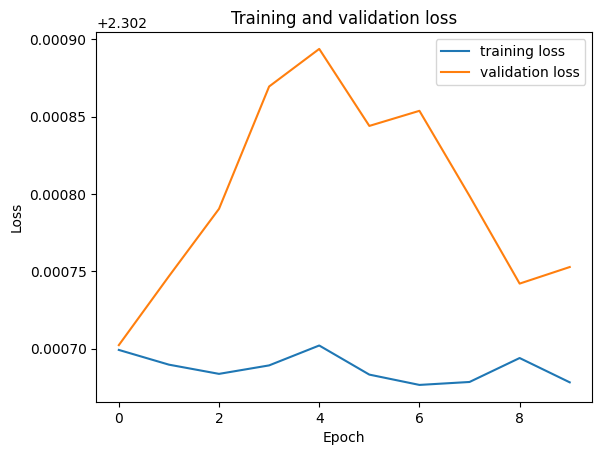

In [32]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

313/313 [==============================] - 4s 9ms/step


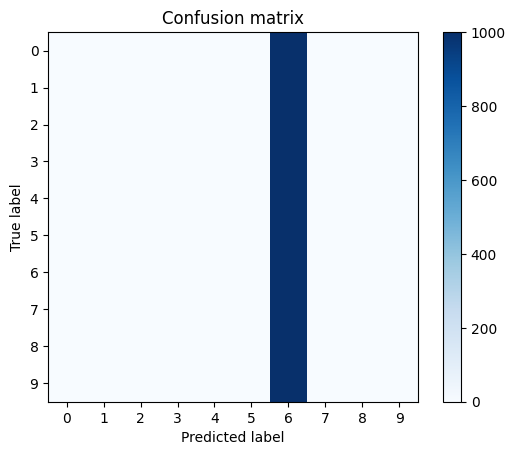

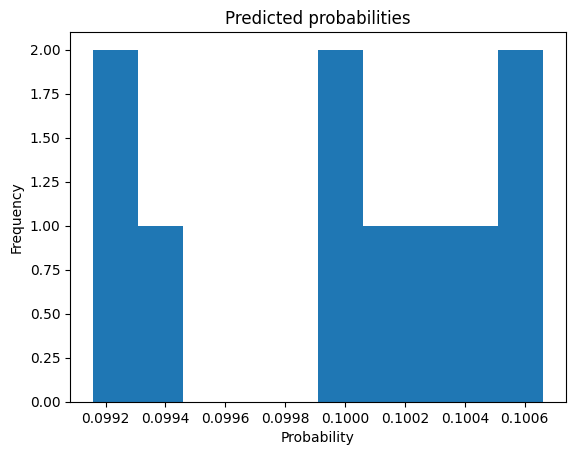

In [33]:
import numpy as np
from sklearn.metrics import confusion_matrix

# calculate the confusion matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.ravel()
cm = confusion_matrix(y_true, y_pred_classes)

# plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, range(num_classes))
plt.yticks(tick_marks, range(num_classes))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# plot a histogram of the predicted probabilities for a sample image
plt.hist(y_pred[1000])
plt.title('Predicted probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.show()